In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt
import json

### Read articles from database

In [3]:
with open('../secrets.json') as file:
    secrets = json.load(file)
    connection_string = secrets['connection_string']

db = create_engine(connection_string)
df = pd.read_sql('select * from news_article', con=db)

### Test out sentiment with a small sample of articles

In [4]:
headlines = df[:15]['headline']
headlines

0     Norway: Dozens hospitalized after underground ...
1     Borders Closing: Hungary to Revive Restrictive...
2     The Only Mongolian-Language Social Media Site ...
3     Boris Johnson 'can't be trusted' on foreign ai...
4     Denied Fair Trial and Disregarded for 238 Days...
5     Coronavirus: India crosses 80,000 cases in a d...
6     With Canada and Mexico borders closed, America...
7     Two teen boys ‘tortured, raped and buried aliv...
8     UNPO: Southern Mongolia: Mother Tongue to be R...
9     French magazine’s depiction of lawmaker as a s...
10    Baltic states blacklist Lukashenko, other Bela...
11    Alleged ‘covidiots’ force all passengers on Gr...
12    Yegor Zhukov: Leading Russian opposition blogg...
13    Facebook bans all QAnon groups as dangerous am...
14    Ontario ombudsman blasts ‘outdated’ police tra...
Name: headline, dtype: object

In [5]:
for headline in headlines:
    blob = TextBlob(headline)
    print(f'{headline}: {round(blob.sentiment.polarity, 2)}')

Norway: Dozens hospitalized after underground bunker party: 0.0
Borders Closing: Hungary to Revive Restrictive Measures on Sept 1: 0.0
The Only Mongolian-Language Social Media Site Was Shut Down in China: -0.04
Boris Johnson 'can't be trusted' on foreign aid as millions sent to China revealed: -0.12
Denied Fair Trial and Disregarded for 238 Days! Kurdish Activist Dies of Hunger Strike in Turkish Jail: 0.39
Coronavirus: India crosses 80,000 cases in a day, first country to do so: 0.25
With Canada and Mexico borders closed, Americans are trapped in their own healthcare system: 0.1
Two teen boys ‘tortured, raped and buried alive’ in Sweden: 0.05
UNPO: Southern Mongolia: Mother Tongue to be Removed from Schools: 0.0
French magazine’s depiction of lawmaker as a slave in chains sparks outrage: 0.0
Baltic states blacklist Lukashenko, other Belarusian officials: -0.12
Alleged ‘covidiots’ force all passengers on Greece-U.K. flight into quarantine: -0.1
Yegor Zhukov: Leading Russian opposition b

### A little test for textblob

In [6]:
blob1 = TextBlob('I think this is good')
blob2 = TextBlob('He won the race')

print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)


### Read all headlines and get the sentiment and subjectivity for each one, then add to dataframe

In [8]:
polarities = []
subjectivities = []

for i in range(len(df)):
    headline = df.iloc[i]['headline']
    blob = TextBlob(headline)
    
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)

In [9]:
df['polarity'] = polarities
df['subjectivity'] = subjectivities

In [10]:
df.describe()

,id,score,polarity,subjectivity
count,5625.000000,5625.000000,5625.000000,5625.000000
mean,2814.000000,9523.348622,0.014469,0.222422
std,1623.941963,19771.144943,0.212646,0.282802
min,2.000000,0.000000,-1.000000,0.000000
25%,1408.000000,654.000000,0.000000,0.000000
50%,2814.000000,1613.000000,0.000000,0.050000
75%,4220.000000,4695.000000,0.045455,0.427273
max,5626.000000,181809.000000,1.000000,1.000000


### Display number of positive, neutral and negative headlines
- positive sentiment: polarity > 0.25
- neutral sentiment: -0.25 <= polarity <= 0.25
- negative sentiment: polarity <= -0.25

In [19]:
positive = df[df['polarity'] > 0.25].reset_index(drop=True)
neutral = df[(df['polarity'] >= -0.25) & (df['polarity'] <= 0.25)].reset_index(drop=True)
negative = df[df['polarity'] < -0.25].reset_index(drop=True)

print(f'Positive: {len(positive)}')
print(f'Neutral: {len(neutral)}')
print(f'Negative: {len(negative)}')

Positive: 487
Neutral: 4760
Negative: 378


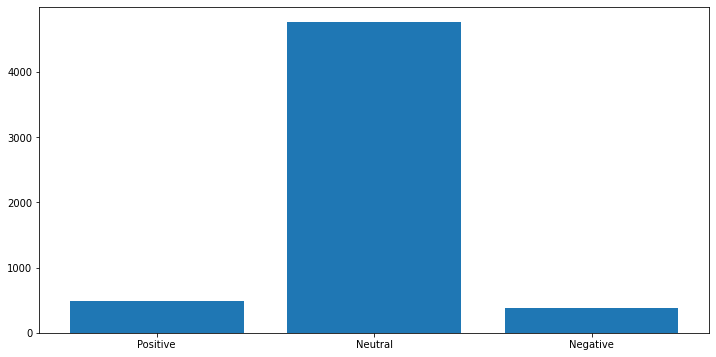

In [20]:
counts = [len(positive), len(neutral), len(negative)]
labels = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.show()

# Average subjectivity broken down by sentiment

Average subjectivity for positive headlines

In [21]:
sum(positive['subjectivity']) / len(positive)

0.624174963184203

Average subjectivity for neutral headlines

In [22]:
sum(neutral['subjectivity']) / len(neutral)

0.14981201769557934

Average subjectivity for negative headlines

In [23]:
sum(negative['subjectivity']) / len(negative)

0.6191743747629982

In [24]:
sorted_df = df.sort_values('polarity')

### Plot every article showing the relationship between sentiment and subjectivity
It seems that when articles are neutral, they are not very subjective. The more positive or negative the sentiment is, the higher the subjectivity, meaning that it is more opinion-based than fact-based.

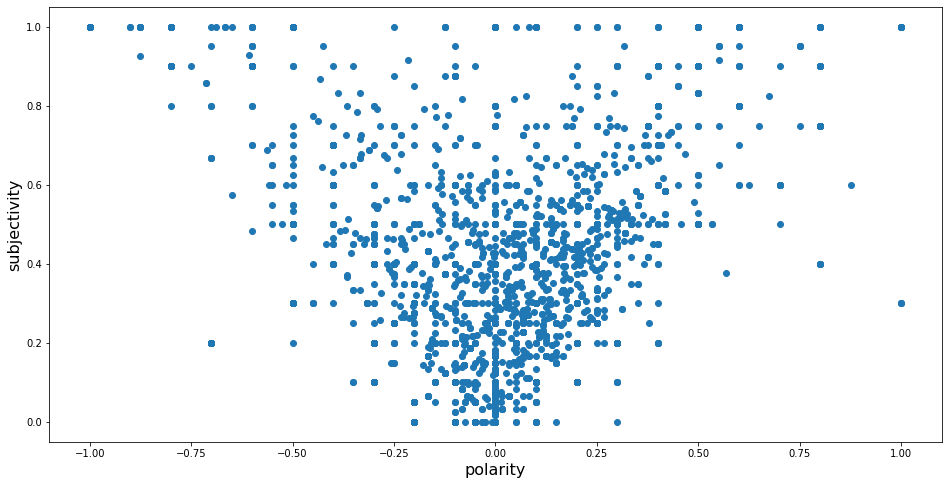

In [25]:
plt.figure(figsize=(16,8))
plt.scatter(sorted_df['polarity'], sorted_df['subjectivity'])
plt.xlabel('polarity', fontsize=16)
plt.ylabel('subjectivity', fontsize=16)
plt.show()